In [1]:
{
    "tags": [
        "skip-execution",
    ]
}

# for colab
%pip install pgmpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import CausalInference

import networkx as nx
import matplotlib.pyplot as plt

# Alarm
From [Codes for Unit 3](https://www2.isye.gatech.edu/isye6420/supporting.html).

Associated lecture videos: Unit 3 [Lesson 7](https://www.youtube.com/watch?v=IbHOo6ifJYE&list=PLv0FeK5oXK4l-RdT6DWJj0_upJOG2WKNO&index=16) and [Lesson 8](https://www.youtube.com/watch?v=iVFycPG26OQ&list=PLv0FeK5oXK4l-RdT6DWJj0_upJOG2WKNO&index=17).

Your house has an alarm system against burglary. The house is located in the seismically active area and the alarm system can get occasionally set off by an earthquake. You have two neighbors, Mary and John, who do not know each other. If they hear the alarm they call you, but this is not guaranteed. They also call you from time to time just to chat. The BUGS code provides an approximate solution for conditional  distributions of nodes given the evidence.

1. Find the probability John calls given an earthquake.

2. Find the probability that there was an earthquake given John has called.

3. Find the probability of an earthquake given John has not called and Mary has called.

Practice: Find the probability that there was a burglary given an alarm has gone off and Mary has not called.

Based on the example at https://pgmpy.org/examples/Earthquake.html, which is almost the exact same problem.

In [3]:
#Defining network structure
alarm_model = BayesianNetwork([('Burglary', 'Alarm'),
                              ('Earthquake', 'Alarm'),
                              ('Alarm', 'JohnCalls'),
                              ('Alarm', 'MaryCalls')])

#Defining the parameters
cpd_burglary = TabularCPD(variable='Burglary', 
                          variable_card=2,
                          values=[[.999], [0.001]])

cpd_earthquake = TabularCPD(variable='Earthquake', 
                            variable_card=2,
                            values=[[0.998], [0.002]])

cpd_alarm = TabularCPD(variable='Alarm', variable_card=2,
                       values=[[0.999, 0.71, 0.06, 0.05],
                               [0.001, 0.29, 0.94, 0.95]],
                       evidence=['Burglary', 'Earthquake'],
                       evidence_card=[2, 2])

cpd_marycalls = TabularCPD(variable='MaryCalls', variable_card=2,
                           values=[[0.99, 0.30 ], 
                                   [0.01, 0.70]],
                           evidence=['Alarm'],
                           evidence_card=[2])

cpd_johncalls = TabularCPD(variable='JohnCalls', variable_card=2,
                           values=[[0.95, 0.1],
                                   [0.05, 0.9]],
                           evidence=['Alarm'],
                           evidence_card=[2])

# Associating the parameters with the model structure
alarm_model.add_cpds(cpd_burglary, cpd_earthquake, cpd_alarm, cpd_johncalls, 
                     cpd_marycalls)

assert alarm_model.check_model(), "Your model doesn't make sense to pgmpy."

print(f"Nodes: {alarm_model.nodes()}")
print(f"Edges: {alarm_model.edges()}")

Nodes: ['Burglary', 'Alarm', 'Earthquake', 'JohnCalls', 'MaryCalls']
Edges: [('Burglary', 'Alarm'), ('Alarm', 'JohnCalls'), ('Alarm', 'MaryCalls'), ('Earthquake', 'Alarm')]


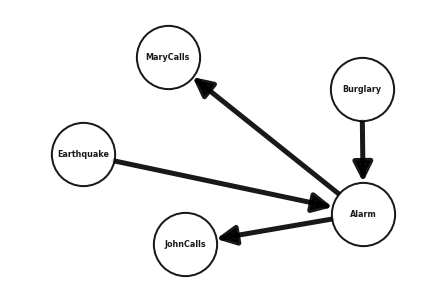

In [4]:
# plot the network

options = {
    'arrowsize': 40,
    'font_size': 8,
    'font_weight': 'bold',
    'node_size': 4000,
    'node_color': 'white',
    'edgecolors': 'black',
    'linewidths': 2,
    'width': 5,
    'alpha': .9
}

nx.draw(alarm_model, with_labels=True, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis('off')
plt.show()


In [5]:
alarm_infer = CausalInference(alarm_model)

# probability John calls given an earthquake.
q = alarm_infer.query(variables=['JohnCalls'], 
                      evidence={'Earthquake': True})
print("P(J|E):")
print(q)

# probability that there was an earthquake given John has called.
q = alarm_infer.query(variables=['Earthquake'], evidence={'JohnCalls': True})
print("P(E|J):")
print(q)

# probability of an earthquake given John has not called and Mary has called.
q = alarm_infer.query(variables=['Earthquake'], 
                      evidence={'JohnCalls': False, 'MaryCalls': True})
print("P(E|J^c, M):")
print(q)
 
# probability of a burglary given an alarm and that Mary has not called.
q = alarm_infer.query(variables=['Burglary'], 
                      evidence={'Alarm': True, 'MaryCalls': False})
print("P(B|A, M^c):")
print(q)

P(J|E):
+--------------+------------------+
| JohnCalls    |   phi(JohnCalls) |
+==============+==================+
| JohnCalls(0) |           0.7029 |
+--------------+------------------+
| JohnCalls(1) |           0.2971 |
+--------------+------------------+
P(E|J):
+---------------+-------------------+
| Earthquake    |   phi(Earthquake) |
+===============+===================+
| Earthquake(0) |            0.9886 |
+---------------+-------------------+
| Earthquake(1) |            0.0114 |
+---------------+-------------------+
P(E|J^c, M):
+---------------+-------------------+
| Earthquake    |   phi(Earthquake) |
+===============+===================+
| Earthquake(0) |            0.9944 |
+---------------+-------------------+
| Earthquake(1) |            0.0056 |
+---------------+-------------------+
P(B|A, M^c):
+-------------+-----------------+
| Burglary    |   phi(Burglary) |
+=============+=================+
| Burglary(0) |          0.6264 |
+-------------+-----------------+
| Bu